[[106104.95856717315, 1.0], [1921626.8505818855, 1.5], [32899609.41782344, 2.0], [1.0, 2.5], [1.0, 3.0]]


C:\Users\jakob\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


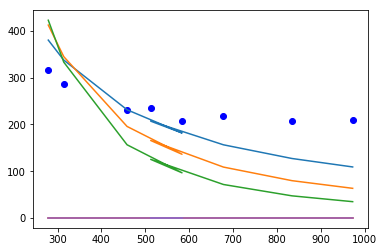

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit as CF

data = np.genfromtxt('measurement1.txt',skip_header=1)

kugle_pos = data[:,0]
ophæng_pos = data[:,1]

#Jeg går ud fra at den sorte kugle er i y=0, så afstanden mellem denne og den nederste kugle er blot kuglens y-værdi
#Jeg ved også at kraften på en fjeder er porportionel med dens udstrækning

naivF = ophæng_pos-kugle_pos

F = lambda r,C,a : C/(r**a)
Cs = []
for i in range(5):
    alpha = i/2+1
    testF = lambda r,C: F(r,C,alpha)
    val, cov = CF(testF,kugle_pos,naivF)
    Cs.append([*val,alpha])
    

print(Cs)
plt.plot(kugle_pos,naivF,'bo')
for C in Cs:
    plt.plot(kugle_pos,F(kugle_pos,C[0],C[1]))
plt.show()